In [1]:
#coding=utf8
import sys
reload(sys)
sys.setdefaultencoding("utf8")
import numpy as np
from numpy.random import multivariate_normal
from matplotlib import  pyplot as plt

In [2]:
samples = multivariate_normal([0,5],np.eye(2),500000)
samples.shape

(500000, 2)

In [3]:
samples[:10]

array([[ 0.83226487,  5.39886572],
       [-0.79780617,  4.11001752],
       [-0.28780027,  4.91525267],
       [ 1.75723856,  5.35919179],
       [ 0.736806  ,  5.99482301],
       [-1.92113306,  4.64049611],
       [-0.17813962,  5.07940742],
       [-1.61683076,  6.23009187],
       [ 0.22006794,  6.25988355],
       [-0.03689414,  4.57176035]])

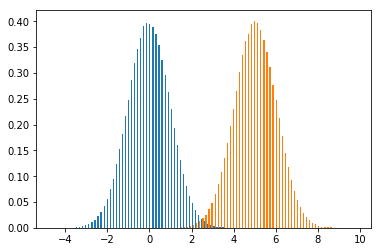

In [4]:
plt.hist(samples,100,normed=True)
plt.show()

10


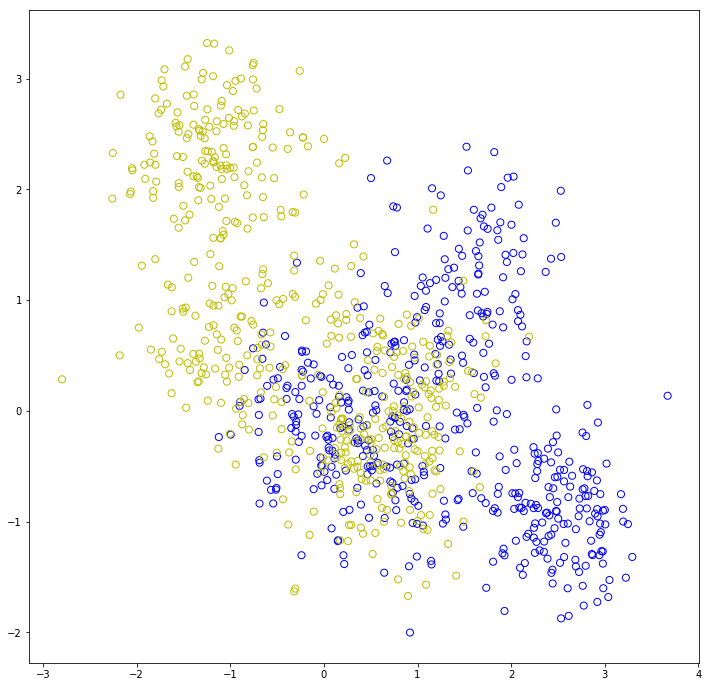

In [171]:
import numpy as np
from numpy.random import multivariate_normal
from numpy import *
from matplotlib import pyplot as plt
import itertools
from IPython.display import display

np.random.seed(9)
sample_num=50
blue_means = multivariate_normal([1,0],np.eye(2),10)
blue_mk_index = np.random.randint(10,size=10)
blue_samples = [  multivariate_normal(blue_means[blue_mk_index[i]] ,np.eye(2)/5 ,sample_num).tolist() for i in range(10) ]
print len(blue_samples)
blue_samples = list(itertools.chain.from_iterable(blue_samples))
blue_samples_x = np.array(blue_samples)[:,0].tolist()
blue_samples_y= np.array(blue_samples)[:,1].tolist()

orange_means = multivariate_normal([0,1],np.eye(2),10)
orange_mk_index = np.random.randint(10,size=10)
orange_samples = [  multivariate_normal(orange_means[orange_mk_index[i]] ,np.eye(2)/5 ,sample_num).tolist() for i in range(10) ]
orange_samples = list(itertools.chain.from_iterable(orange_samples))
orange_samples_x = np.array(orange_samples)[:,0].tolist()
orange_samples_y= np.array(orange_samples)[:,1].tolist()
plt.figure(figsize=(12,12))
plt.scatter(blue_samples_x,blue_samples_y,color='', marker='o', edgecolors='b', s=50)
plt.scatter(orange_samples_x,orange_samples_y, color='', marker='o', edgecolors='y', s=50)
plt.show()




(500, (1000, 3), (1, 1000))

'beta'

matrix([[-0.21568774],
        [ 0.03189593],
        [ 0.5987918 ]])

('aa', matrix([[-135.17029026],
         [ 395.87278548],
         [ 500.        ]]), matrix([[-135.17029026],
         [ 395.87278548],
         [ 500.        ]]))

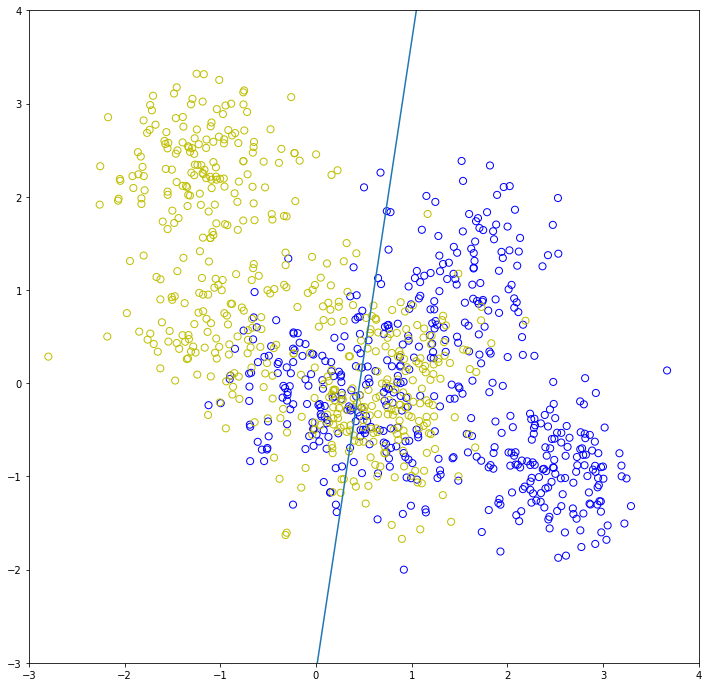

In [172]:
from numpy import *
samples_x=np.mat(orange_samples+blue_samples)
constant_x = np.mat(np.ones([samples_x.shape[0],1]))
samples_x= np.hstack(  (samples_x,constant_x))
samples_y = np.mat([1]*len(orange_samples) + [0]*len(blue_samples))
display( (len(orange_samples), samples_x.shape,samples_y.shape))
 

beta= ((samples_x.T * samples_x).I)*(samples_x.T)*(samples_y.T)
display("beta",beta)
x = np.linspace(-4,4,10)
y = [ (0.5- beta[0,0] * v-beta[2,0] )/beta[1,0] for v in x.tolist()]
#y = [ (0.5- beta[0,0] * v )/beta[1,0] for v in x.tolist()]

sample_y_list = samples_y.tolist()
sample_y_predict = [ item[0]*beta[0,0] + item[1]*beta[1,0] for item in samples_x.tolist() ]
import math


y_predict=[]

display( ("aa",samples_x.T*(samples_y.T) ,samples_x.T*(samples_x*beta)))

plt.figure(figsize=(12,12))
plt.scatter(blue_samples_x,blue_samples_y,color='', marker='o', edgecolors='b', s=50)
plt.scatter(orange_samples_x,orange_samples_y, color='', marker='o', edgecolors='y', s=50)
plt.xlim(-3,4)
plt.ylim(-3,4)
plt.plot(x,y)
#plt.show()

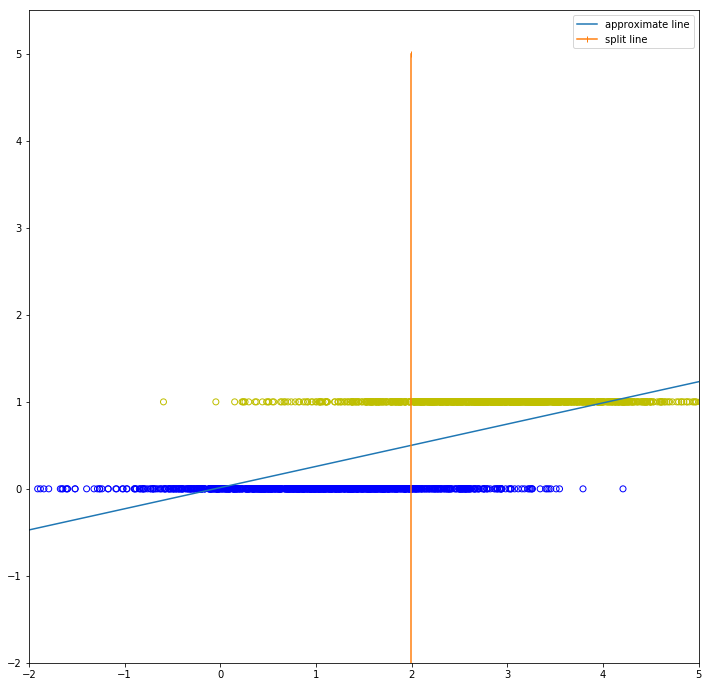

([1.9949090022261005, 1.9949090022261005], [-5, 5])

In [170]:
np.random.seed(9)
sample_num=1000
samples_x=np.vstack((np.random.normal(size=sample_num).reshape([-1,1])+1 ,np.random.normal(size=sample_num).reshape([-1,1])+3))
samples_y=np.array([0]*sample_num + [1]*sample_num).reshape([-1,1])

samples_x_mat = np.mat(np.hstack((samples_x,np.ones([samples_x.shape[0],1]))))
samples_y_mat = np.mat(samples_y)

beta=(samples_x_mat.T * samples_x_mat).I * samples_x_mat.T * samples_y_mat 
x_points = np.linspace(-2,5,30)
y_appro_points = [ np.array(beta).reshape([-1]).dot(np.array([v,1])) for v in x_points.tolist() ]

y_points = [ (0.5-beta[0,0] * v - beta[1,0]) for v in x_points.tolist() ]
x_split = (0.5 - beta[1,0])/beta[0,0]

plt.figure(figsize=(12,12))
plt.scatter(samples_x[:sample_num],samples_y[:sample_num],color='',marker='o',edgecolors='b')
plt.scatter(samples_x[sample_num:],samples_y[sample_num:],color='',marker='o',edgecolors='y')

#plt.plot(x_points,y_points,label="classification line")
plt.plot(x_points,y_appro_points,label="approximate line")
plt.plot([x_split,x_split],[-5,5],marker='|',label="split line")
plt.ylim(-2,)
plt.xlim(-2,5)
plt.legend(loc="upper right")
plt.show()
[x_split,x_split],[-5,5]

In [53]:
a=[1,2]
b=[3,4]
c = np.stack((a,b))
d=np.mat(c)
e=np.hstack((c,np.ones([d.shape[0],1 ] )))
e,e.shape,d.size,d.shape,c,c.size,c.shape[0]


(array([[1., 2., 1.],
        [3., 4., 1.]]), (2, 3), 4, (2, 2), array([[1, 2],
        [3, 4]]), 4, 2)

In [140]:
np.dot( np.array([1,2]),np.array([3,4])),np.array([1,2]).dot(np.array([3,4]))



(11, 11)